In [1]:
from config import *
from map_wrapper import *

In [2]:
print(f"{year}-{month:02}")

2020-03


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from mpl_toolkits.basemap import Basemap

In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
conn=db.get_conn()

In [6]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [7]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [8]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [9]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [10]:
data_city=get_sub_stats_by_col(data,'city')
data_city.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
8,北京,18543,3750,15500,45000,18386,9.29%
0,上海,17114,5250,15000,37500,34604,17.48%
1,深圳,16912,6000,15000,37500,27306,13.79%
12,杭州,15772,3750,14000,37500,10260,5.18%
7,广州,13749,3750,12500,30000,21094,10.65%
10,南京,13559,4678,12500,29166,10611,5.36%
3,成都,12625,3750,11500,30000,9668,4.88%
11,苏州,12319,3750,11500,25000,6022,3.04%
22,天津,12080,5000,10000,25453,1844,0.93%
15,东莞,12020,4328,11500,22500,2085,1.05%


In [11]:
describe(data_city,'程序员')

2020年3月北京招收程序员18386人。2019年3月北京程序员平均工资18543元，工资中位数15500元，其中95%的人的工资介于3750元到45000元。

2020年3月上海招收程序员34604人。2019年3月上海程序员平均工资17114元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2020年3月深圳招收程序员27306人。2019年3月深圳程序员平均工资16912元，工资中位数15000元，其中95%的人的工资介于6000元到37500元。

2020年3月杭州招收程序员10260人。2019年3月杭州程序员平均工资15772元，工资中位数14000元，其中95%的人的工资介于3750元到37500元。

2020年3月广州招收程序员21094人。2019年3月广州程序员平均工资13749元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2020年3月南京招收程序员10611人。2019年3月南京程序员平均工资13559元，工资中位数12500元，其中95%的人的工资介于4678元到29166元。

2020年3月成都招收程序员9668人。2019年3月成都程序员平均工资12625元，工资中位数11500元，其中95%的人的工资介于3750元到30000元。

2020年3月苏州招收程序员6022人。2019年3月苏州程序员平均工资12319元，工资中位数11500元，其中95%的人的工资介于3750元到25000元。

2020年3月天津招收程序员1844人。2019年3月天津程序员平均工资12080元，工资中位数10000元，其中95%的人的工资介于5000元到25453元。

2020年3月东莞招收程序员2085人。2019年3月东莞程序员平均工资12020元，工资中位数11500元，其中95%的人的工资介于4328元到22500元。

2020年3月武汉招收程序员11415人。2019年3月武汉程序员平均工资11997元，工资中位数11500元，其中95%的人的工资介于3750元到27000元。

2020年3月西安招收程序员5910人。2019年3月西安程序员平均工资11842元，工资中位数11000元，其中95%的人的工资介于3750元到27500元。

2020年3月长沙

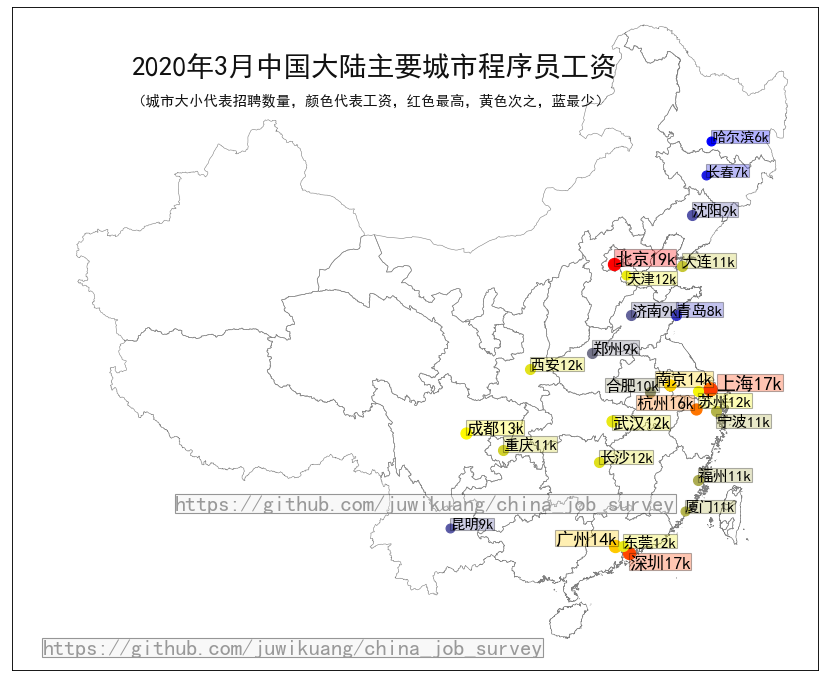

In [12]:
draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [13]:
data_blockchain=get_sub_stats_by_col(data[(data.expert_blockchain==1)],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
13,大连,30000,30000,30000,30000,1,0.19%
3,上海,27341,12000,29700,37167,88,16.33%
5,北京,26219,11000,25000,60000,51,9.46%
8,郑州,22500,22500,22500,22500,5,0.93%
16,苏州,22500,22500,22500,22500,2,0.37%
11,南京,20000,17500,17500,37500,8,1.48%
12,厦门,20000,17500,20000,32500,6,1.11%
4,深圳,18903,4038,20000,31219,101,18.74%
0,广州,17879,6000,15000,30000,186,34.51%
6,成都,17820,11500,17000,25000,25,4.64%


In [14]:
describe(data_blockchain,'区块链工程师')

2020年3月大连招收区块链工程师1人。2019年3月大连区块链工程师平均工资30000元，工资中位数30000元，其中95%的人的工资介于30000元到30000元。

2020年3月上海招收区块链工程师88人。2019年3月上海区块链工程师平均工资27341元，工资中位数29700元，其中95%的人的工资介于12000元到37167元。

2020年3月北京招收区块链工程师51人。2019年3月北京区块链工程师平均工资26219元，工资中位数25000元，其中95%的人的工资介于11000元到60000元。

2020年3月郑州招收区块链工程师5人。2019年3月郑州区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年3月苏州招收区块链工程师2人。2019年3月苏州区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年3月南京招收区块链工程师8人。2019年3月南京区块链工程师平均工资20000元，工资中位数17500元，其中95%的人的工资介于17500元到37500元。

2020年3月厦门招收区块链工程师6人。2019年3月厦门区块链工程师平均工资20000元，工资中位数20000元，其中95%的人的工资介于17500元到32500元。

2020年3月深圳招收区块链工程师101人。2019年3月深圳区块链工程师平均工资18903元，工资中位数20000元，其中95%的人的工资介于4038元到31219元。

2020年3月广州招收区块链工程师186人。2019年3月广州区块链工程师平均工资17879元，工资中位数15000元，其中95%的人的工资介于6000元到30000元。

2020年3月成都招收区块链工程师25人。2019年3月成都区块链工程师平均工资17820元，工资中位数17000元，其中95%的人的工资介于11500元到25000元。

2020年3月杭州招收区块链工程师36人。2019年3月杭州区块链工程师平均工资17391元，工资中位数18950元，其中95%的人的工资介于2500元到29778元。

2020年3月宁波招收区块链工程师2人。2019年3月宁波区块链工程师平均工资16166元，工资中

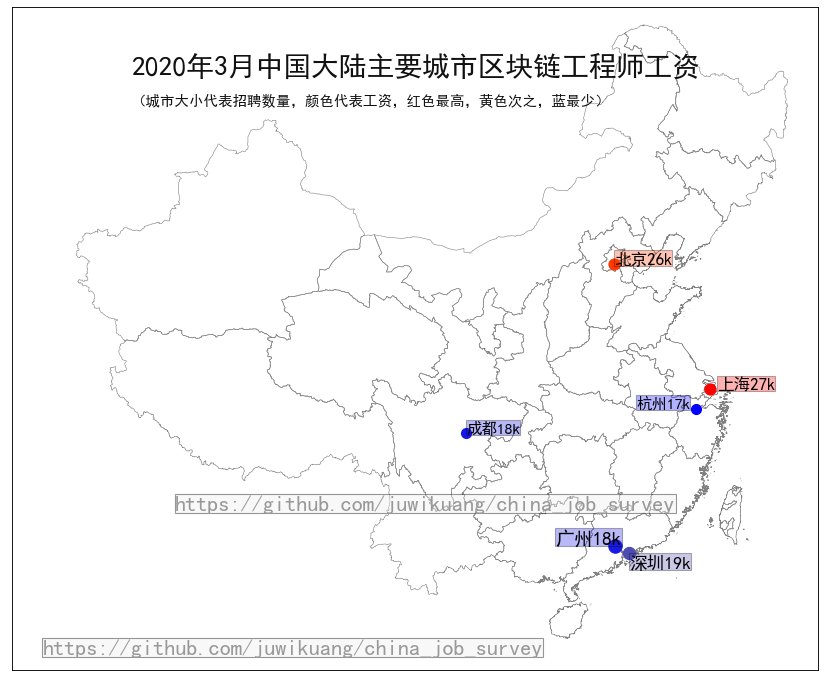

In [15]:
draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 算法工程师

In [16]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
1,北京,22835,6659,20833,47500,2551,13.32%
2,上海,22640,6500,20833,50000,3904,20.39%
3,深圳,21089,5250,19000,50000,3224,16.83%
9,杭州,19988,3750,17500,45000,1170,6.11%
14,广州,18440,5250,17500,40000,1742,9.10%
17,南京,17126,5483,16000,35000,1089,5.69%
15,合肥,15713,6762,14000,37406,221,1.15%
0,西安,15693,4312,12933,50000,620,3.24%
12,苏州,15679,5759,15000,31250,809,4.22%
8,厦门,15487,7500,14000,28714,76,0.40%


In [17]:
describe(data_city_algorithm,'算法工程师')

2020年3月北京招收算法工程师2551人。2019年3月北京算法工程师平均工资22835元，工资中位数20833元，其中95%的人的工资介于6659元到47500元。

2020年3月上海招收算法工程师3904人。2019年3月上海算法工程师平均工资22640元，工资中位数20833元，其中95%的人的工资介于6500元到50000元。

2020年3月深圳招收算法工程师3224人。2019年3月深圳算法工程师平均工资21089元，工资中位数19000元，其中95%的人的工资介于5250元到50000元。

2020年3月杭州招收算法工程师1170人。2019年3月杭州算法工程师平均工资19988元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2020年3月广州招收算法工程师1742人。2019年3月广州算法工程师平均工资18440元，工资中位数17500元，其中95%的人的工资介于5250元到40000元。

2020年3月南京招收算法工程师1089人。2019年3月南京算法工程师平均工资17126元，工资中位数16000元，其中95%的人的工资介于5483元到35000元。

2020年3月合肥招收算法工程师221人。2019年3月合肥算法工程师平均工资15713元，工资中位数14000元，其中95%的人的工资介于6762元到37406元。

2020年3月西安招收算法工程师620人。2019年3月西安算法工程师平均工资15693元，工资中位数12933元，其中95%的人的工资介于4312元到50000元。

2020年3月苏州招收算法工程师809人。2019年3月苏州算法工程师平均工资15679元，工资中位数15000元，其中95%的人的工资介于5759元到31250元。

2020年3月厦门招收算法工程师76人。2019年3月厦门算法工程师平均工资15487元，工资中位数14000元，其中95%的人的工资介于7500元到28714元。

2020年3月天津招收算法工程师164人。2019年3月天津算法工程师平均工资15246元，工资中位数15000元，其中95%的人的工资介于7000元到29100元。

2020年3月长沙招收算法工程师437人。2019年3月长沙算法工程师平均工资15074元，工资中位数14571元，其中

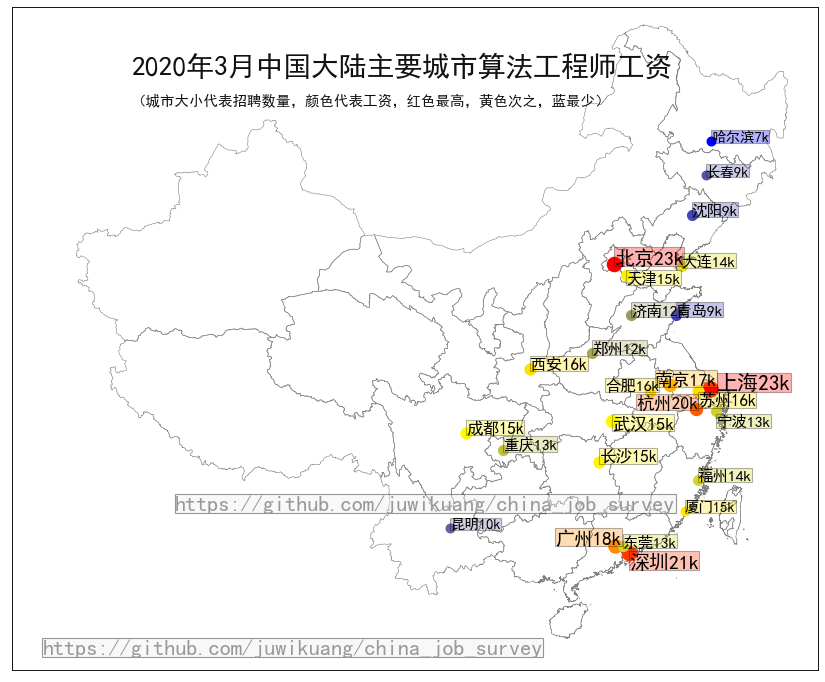

In [18]:
draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市算法工程师工资')

# 系统架构师

In [19]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,北京,30693,10000,30000,55000,1197,15.95%
14,杭州,27394,6832,26500,46812,433,5.77%
7,深圳,27029,9000,26500,46000,1033,13.77%
4,上海,24433,7000,22500,47500,1578,21.03%
2,南京,20916,7850,20000,37500,294,3.92%
3,广州,20765,5236,20000,41666,1142,15.22%
8,成都,19321,6555,17500,44229,217,2.89%
11,长沙,18433,9000,18167,34750,144,1.92%
1,武汉,17388,7000,17500,33833,348,4.64%
9,苏州,17093,2136,14083,42750,152,2.03%


In [20]:
describe(data_city_architect,'系统架构师')

2020年3月北京招收系统架构师1197人。2019年3月北京系统架构师平均工资30693元，工资中位数30000元，其中95%的人的工资介于10000元到55000元。

2020年3月杭州招收系统架构师433人。2019年3月杭州系统架构师平均工资27394元，工资中位数26500元，其中95%的人的工资介于6832元到46812元。

2020年3月深圳招收系统架构师1033人。2019年3月深圳系统架构师平均工资27029元，工资中位数26500元，其中95%的人的工资介于9000元到46000元。

2020年3月上海招收系统架构师1578人。2019年3月上海系统架构师平均工资24433元，工资中位数22500元，其中95%的人的工资介于7000元到47500元。

2020年3月南京招收系统架构师294人。2019年3月南京系统架构师平均工资20916元，工资中位数20000元，其中95%的人的工资介于7850元到37500元。

2020年3月广州招收系统架构师1142人。2019年3月广州系统架构师平均工资20765元，工资中位数20000元，其中95%的人的工资介于5236元到41666元。

2020年3月成都招收系统架构师217人。2019年3月成都系统架构师平均工资19321元，工资中位数17500元，其中95%的人的工资介于6555元到44229元。

2020年3月长沙招收系统架构师144人。2019年3月长沙系统架构师平均工资18433元，工资中位数18167元，其中95%的人的工资介于9000元到34750元。

2020年3月武汉招收系统架构师348人。2019年3月武汉系统架构师平均工资17388元，工资中位数17500元，其中95%的人的工资介于7000元到33833元。

2020年3月苏州招收系统架构师152人。2019年3月苏州系统架构师平均工资17093元，工资中位数14083元，其中95%的人的工资介于2136元到42750元。

2020年3月重庆招收系统架构师128人。2019年3月重庆系统架构师平均工资17074元，工资中位数17500元，其中95%的人的工资介于7114元到27500元。

2020年3月西安招收系统架构师186人。2019年3月西安系统架构师平均工资16686元，工资中位数15000元，其中

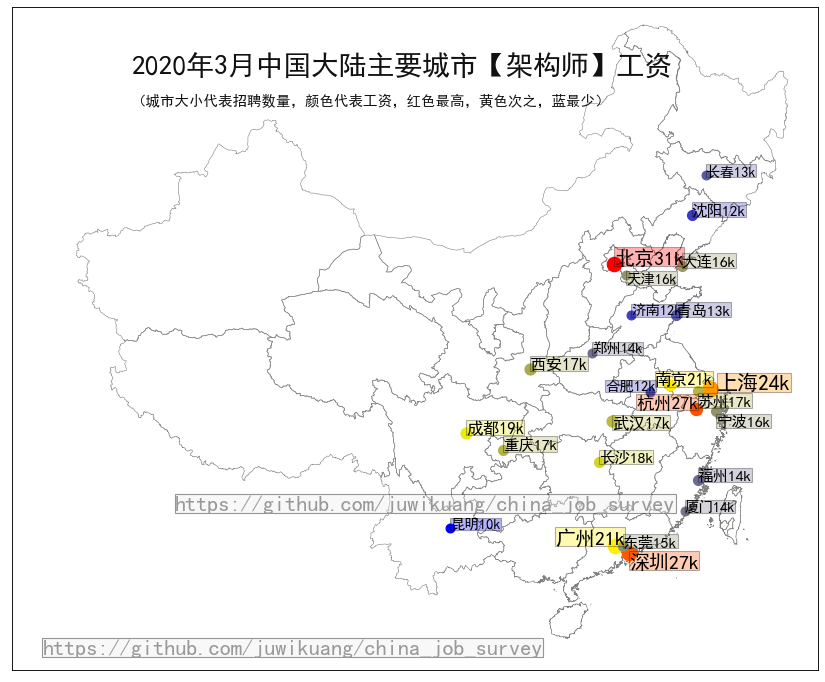

In [21]:
draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [22]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,宁波,16000,16000,16000,16000,1,4.00%
4,北京,15000,15000,15000,15000,5,20.00%
1,苏州,12500,12500,12500,12500,1,4.00%
3,杭州,11500,11500,11500,11500,1,4.00%
0,广州,11375,7000,11375,14000,8,32.00%
6,上海,9800,8000,9800,12500,5,20.00%
2,武汉,9000,9000,9000,9000,1,4.00%
7,南京,9000,9000,9000,9000,3,12.00%


In [23]:
describe(data_bio,'生物信息工程师')

2020年3月宁波招收生物信息工程师1人。2019年3月宁波生物信息工程师平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020年3月北京招收生物信息工程师5人。2019年3月北京生物信息工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2020年3月苏州招收生物信息工程师1人。2019年3月苏州生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年3月杭州招收生物信息工程师1人。2019年3月杭州生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2020年3月广州招收生物信息工程师8人。2019年3月广州生物信息工程师平均工资11375元，工资中位数11375元，其中95%的人的工资介于7000元到14000元。

2020年3月上海招收生物信息工程师5人。2019年3月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2020年3月武汉招收生物信息工程师1人。2019年3月武汉生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2020年3月南京招收生物信息工程师3人。2019年3月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。



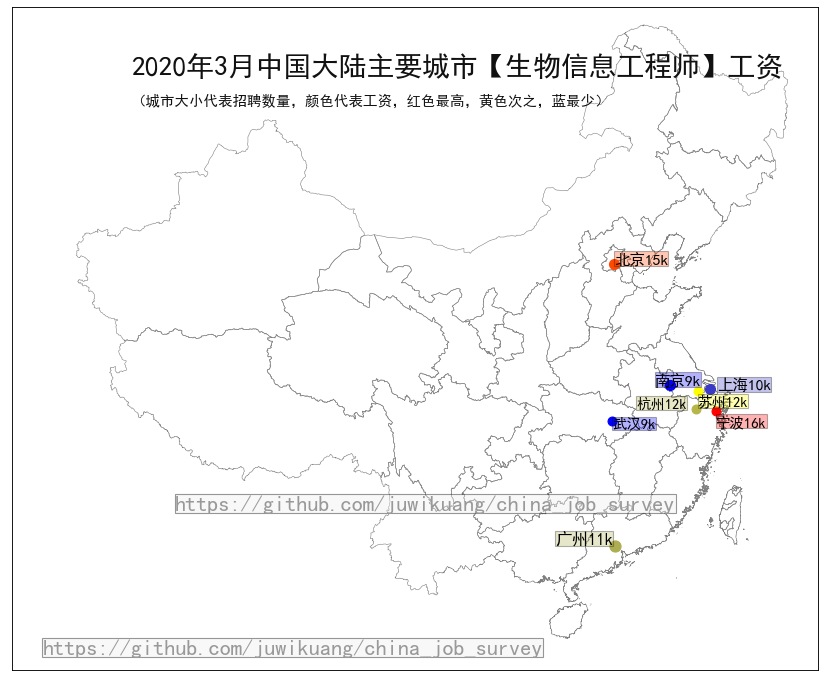

In [24]:
draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [25]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
4,北京,16109,11500,17500,20000,23,9.58%
3,上海,14092,4088,13400,34156,49,20.42%
1,深圳,11923,5250,11000,24000,39,16.25%
2,长沙,8500,7000,9000,9500,15,6.25%
8,广州,8275,1750,7750,16500,20,8.33%
5,成都,7125,6025,6250,11400,32,13.33%
9,西安,6500,5250,6250,9000,14,5.83%


In [26]:
describe(data_spider, '爬虫工程师')

2020年3月北京招收爬虫工程师23人。2019年3月北京爬虫工程师平均工资16109元，工资中位数17500元，其中95%的人的工资介于11500元到20000元。

2020年3月上海招收爬虫工程师49人。2019年3月上海爬虫工程师平均工资14092元，工资中位数13400元，其中95%的人的工资介于4088元到34156元。

2020年3月深圳招收爬虫工程师39人。2019年3月深圳爬虫工程师平均工资11923元，工资中位数11000元，其中95%的人的工资介于5250元到24000元。

2020年3月长沙招收爬虫工程师15人。2019年3月长沙爬虫工程师平均工资8500元，工资中位数9000元，其中95%的人的工资介于7000元到9500元。

2020年3月广州招收爬虫工程师20人。2019年3月广州爬虫工程师平均工资8275元，工资中位数7750元，其中95%的人的工资介于1750元到16500元。

2020年3月成都招收爬虫工程师32人。2019年3月成都爬虫工程师平均工资7125元，工资中位数6250元，其中95%的人的工资介于6025元到11400元。

2020年3月西安招收爬虫工程师14人。2019年3月西安爬虫工程师平均工资6500元，工资中位数6250元，其中95%的人的工资介于5250元到9000元。



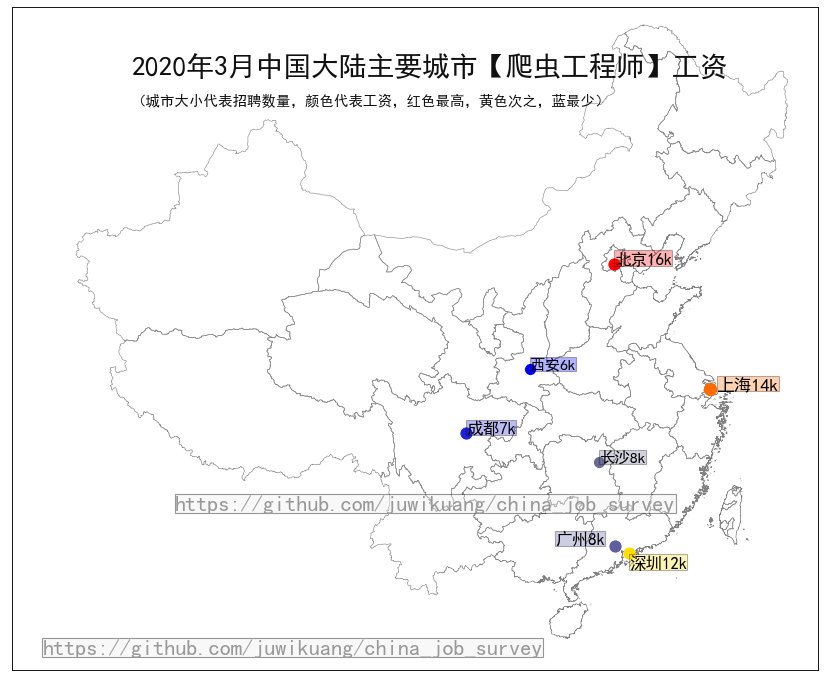

In [27]:
draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [28]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,北京,17363,3750,15000,40000,8307,9.56%
0,深圳,16932,7000,15000,37500,10297,11.85%
1,上海,16910,5500,15104,37500,14821,17.05%
10,杭州,15708,3750,13945,40000,4801,5.52%
4,广州,13807,3750,12500,30000,10239,11.78%
8,南京,13136,4500,12500,27500,5532,6.37%
17,东莞,12285,3644,12000,24562,601,0.69%
20,苏州,12003,3413,11000,25000,2070,2.38%
13,成都,11862,3750,11000,25000,3651,4.20%
3,武汉,11617,3750,10500,26000,4460,5.13%


In [29]:
describe(data_java, 'Java程序员')

2020年3月北京招收Java程序员8307人。2019年3月北京Java程序员平均工资17363元，工资中位数15000元，其中95%的人的工资介于3750元到40000元。

2020年3月深圳招收Java程序员10297人。2019年3月深圳Java程序员平均工资16932元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年3月上海招收Java程序员14821人。2019年3月上海Java程序员平均工资16910元，工资中位数15104元，其中95%的人的工资介于5500元到37500元。

2020年3月杭州招收Java程序员4801人。2019年3月杭州Java程序员平均工资15708元，工资中位数13945元，其中95%的人的工资介于3750元到40000元。

2020年3月广州招收Java程序员10239人。2019年3月广州Java程序员平均工资13807元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2020年3月南京招收Java程序员5532人。2019年3月南京Java程序员平均工资13136元，工资中位数12500元，其中95%的人的工资介于4500元到27500元。

2020年3月东莞招收Java程序员601人。2019年3月东莞Java程序员平均工资12285元，工资中位数12000元，其中95%的人的工资介于3644元到24562元。

2020年3月苏州招收Java程序员2070人。2019年3月苏州Java程序员平均工资12003元，工资中位数11000元，其中95%的人的工资介于3413元到25000元。

2020年3月成都招收Java程序员3651人。2019年3月成都Java程序员平均工资11862元，工资中位数11000元，其中95%的人的工资介于3750元到25000元。

2020年3月武汉招收Java程序员4460人。2019年3月武汉Java程序员平均工资11617元，工资中位数10500元，其中95%的人的工资介于3750元到26000元。

2020年3月大连招收Java程序员4344人。2019年3月大连Java程序员平均工资11516元，工资中位数9500元，其中95%的人的工资介于2500元到30780元。

2020年3月西安

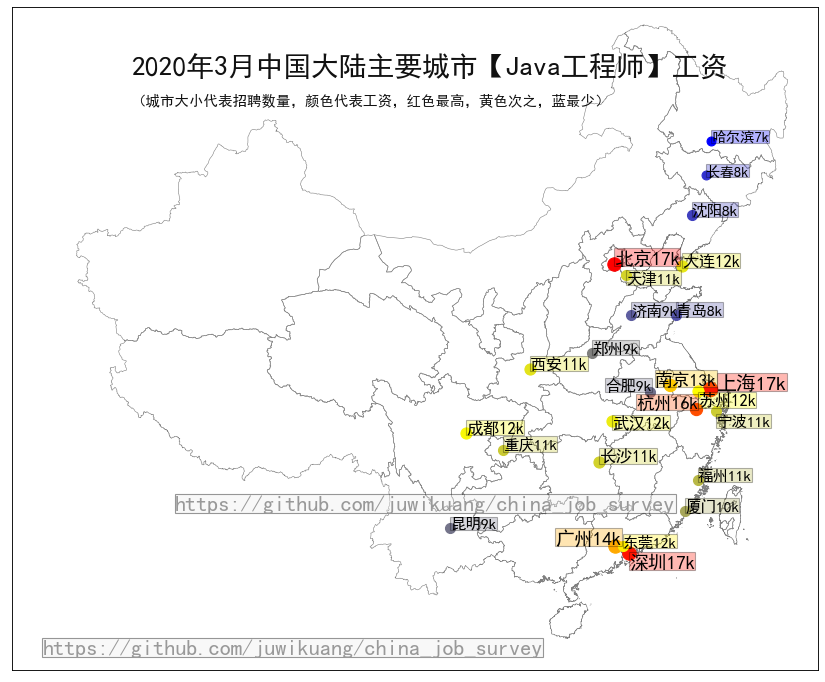

In [30]:
draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

# Python程序员

In [31]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'city')

data_python.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,23971,5270,22500,46330,3547,14.85%
1,上海,21024,6326,20000,45000,5001,20.93%
3,深圳,20726,7000,17500,45950,3096,12.96%
13,杭州,20480,3750,17500,45000,1300,5.44%
14,广州,17083,5250,15000,37500,2468,10.33%
5,成都,15553,3500,13500,35000,1231,5.15%
9,天津,15165,6654,13000,28622,203,0.85%
10,西安,14725,5250,13950,37708,750,3.14%
4,南京,14655,4481,12500,30000,1538,6.44%
7,武汉,14287,3912,12500,36875,910,3.81%


In [32]:
describe(data_python, 'Python程序员')

2020年3月北京招收Python程序员3547人。2019年3月北京Python程序员平均工资23971元，工资中位数22500元，其中95%的人的工资介于5270元到46330元。

2020年3月上海招收Python程序员5001人。2019年3月上海Python程序员平均工资21024元，工资中位数20000元，其中95%的人的工资介于6326元到45000元。

2020年3月深圳招收Python程序员3096人。2019年3月深圳Python程序员平均工资20726元，工资中位数17500元，其中95%的人的工资介于7000元到45950元。

2020年3月杭州招收Python程序员1300人。2019年3月杭州Python程序员平均工资20480元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2020年3月广州招收Python程序员2468人。2019年3月广州Python程序员平均工资17083元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2020年3月成都招收Python程序员1231人。2019年3月成都Python程序员平均工资15553元，工资中位数13500元，其中95%的人的工资介于3500元到35000元。

2020年3月天津招收Python程序员203人。2019年3月天津Python程序员平均工资15165元，工资中位数13000元，其中95%的人的工资介于6654元到28622元。

2020年3月西安招收Python程序员750人。2019年3月西安Python程序员平均工资14725元，工资中位数13950元，其中95%的人的工资介于5250元到37708元。

2020年3月南京招收Python程序员1538人。2019年3月南京Python程序员平均工资14655元，工资中位数12500元，其中95%的人的工资介于4481元到30000元。

2020年3月武汉招收Python程序员910人。2019年3月武汉Python程序员平均工资14287元，工资中位数12500元，其中95%的人的工资介于3912元到36875元。

2020年3月长沙招收Python程序员568人。2019年3月长沙Python程序员平均工资14243元，工资中位数1250

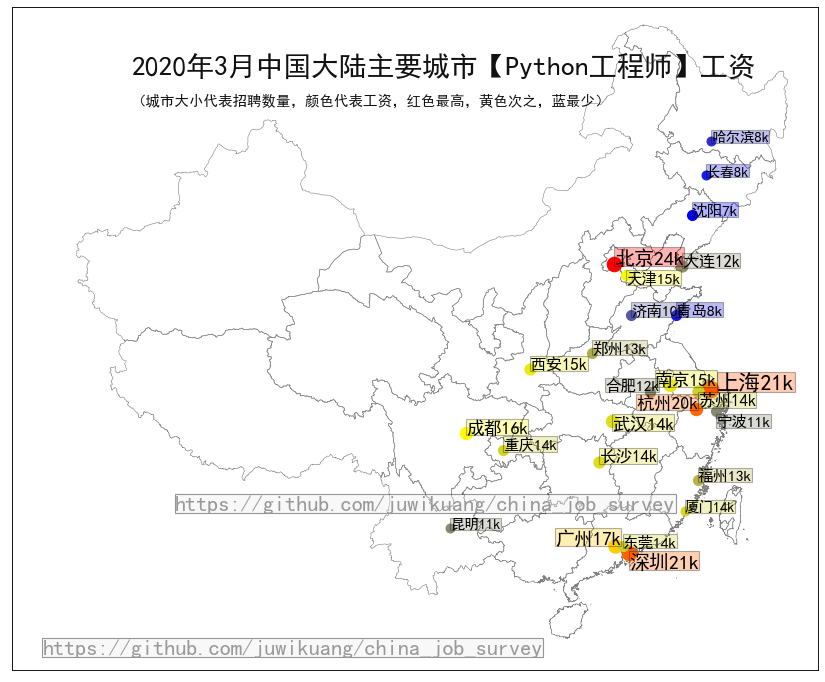

In [33]:
draw_city_map(data_python, 100,  f'{year}年{month}月中国大陆主要城市【Python工程师】工资')

In [12]:
history_data = pd.read_sql(sql='select * from CityStats', con=conn)

In [13]:
del history_data['Id']

In [14]:
history_data.head()

,Month,City,Salary
0,201906,哈尔滨,5983
1,201906,杭州,14707
2,201906,厦门,9789
3,201906,苏州,11197
4,201906,长沙,10852


In [15]:
data_hangzhou = history_data[history_data.City=='杭州']

In [16]:
del data_hangzhou['City']

In [17]:
import matplotlib.pyplot as plt

In [18]:
data_hangzhou.Salary.values

array([14707, 14980, 15106, 14980, 14758, 14921, 15050, 15375, 15566,
       15771], dtype=int64)

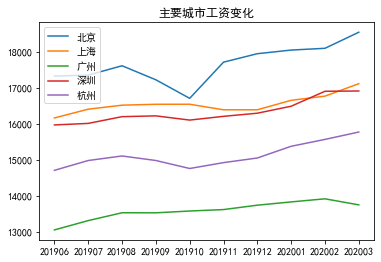

In [19]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
cities = set(history_data.City)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()
plt.show()